## Final Project Submission

Please fill out:
* Student name: Lauren Esser
* Student pace: Full time
* Scheduled project review date/time: Tuesday, Sept 8 at 4:30 pm
* Instructor name: James Irving
* Blog post URL: https://lauren-esser.github.io/osemn_is_awesome


# Introduction

Choose if I am aiming for inference or prediction purposes (in lesson 19). Must state which in the intro paragraph.


Write a paragraph summarizing notebook here


GOAL = Your target audience is non-technical people interested in using your findings to maximize their profit when selling their home. What can they do to their home to increase their homes value. Think of pitching to people who are going to be selling their homes


**NEED to WRITE MY OWN READ ME

Include:
- 3 meaningful questions(don't need to present these to non-techincal audience. Just for notebook)
- 4 meaningful data visualizations with coreesponding interpretations (make sure to label, title, and legened (when appropriate)
- Intro paragraph explaining approach to project




look out for:
- categorical vs. numerical
- make sure to use QQPlots


# Obtain Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf


Here I imported the dataframe and set options to display maximum rows.

In [2]:
df = pd.read_csv("kc_house_data.csv")
pd.set_option('display.max_columns', 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Check for Duplicates

Below I checked for duplicates in the dataframe using the id column. 

-  177 duplicates

Reasoning for this could be if a specific house sold more than one time over the data collection period. I chose to drop the duplicates for the id column in order to represent each house only once. By using keep = first I chose to keep the first occurring id only and drop any after that.

In [3]:
#Check for duplicates
duplicates = df[df.duplicated(subset = 'id')]
print(len(duplicates))
duplicates.head()

177


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,3,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0.0,0.0,3,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0.0,0.0,3,6,1000,0.0,1943,NaN,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0.0,0.0,5,7,1100,1080.0,1954,0.0,98133,47.7711,-122.341,1810,6929


In [4]:
#Drop duplicates using id column.
df.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 

In [5]:
#Recheck for duplicates
duplicates = df[df.duplicated(subset = 'id')]
print(len(duplicates))
duplicates.head()

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [6]:
#check len/val
df.id.sort_values()

2494        1000102
6729        1200019
8404        1200021
8800        2800031
3553        3600057
            ...    
16723    9842300095
3257     9842300485
7614     9842300540
20963    9895000040
15937    9900000190
Name: id, Length: 21420, dtype: int64

In [7]:
#drop id since it is no longer needed
df.drop(['id'], axis=1, inplace=True)

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 20 columns):
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.4+ MB


### Observations

- D-Types:
    - float64 = 8
    - int64 = 10
    - object = 2 (Need to switch sqft_basement over to float)
- Missing Data:
    - waterfront
    - view
    - yr_renovated

# Scrub

### Check for labeled categorical columns

In [11]:
cat_cols = df.select_dtypes('object')
cat_cols

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


In [41]:
#while at it create numerical columns list
num_cols = list(df.select_dtypes('number').columns)
num_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

Above shows that there are only two labeled as an object or categorical column: data and sqft_basement. Since sqft_basement is numerical I am going to convert it to a float below.

In [12]:
#Look at val_counts for sqft_basement
df.sqft_basement.value_counts(dropna = False, normalize=True)

0.0       0.593697
?         0.021102
600.0     0.010084
500.0     0.009617
700.0     0.009570
            ...   
768.0     0.000047
3480.0    0.000047
172.0     0.000047
2730.0    0.000047
1248.0    0.000047
Name: sqft_basement, Length: 304, dtype: float64

In [13]:
#replace ? with 0.0
df.sqft_basement = df.sqft_basement.replace('?', '0.0')

I am assuming that a ? assumes there is no basement present therefore I switched ? over to 0.0 in the data.

In [14]:
#Recheck val_counts
df.sqft_basement.value_counts(dropna = False, normalize=True)

0.0       0.614799
600.0     0.010084
500.0     0.009617
700.0     0.009570
800.0     0.009384
            ...   
2500.0    0.000047
243.0     0.000047
588.0     0.000047
1920.0    0.000047
768.0     0.000047
Name: sqft_basement, Length: 303, dtype: float64

In [15]:
#Save and convert to float
df.sqft_basement = df.sqft_basement.astype('float')

### Examine Nulls

In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,17616.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,285.904342,1971.092997,83.847241,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,440.008202,29.387141,400.436625,53.47748,0.138589,0.140791,685.537057,27345.621867
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,550.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


Below I looked to see if there are any rows with over two nulls. Since more information is missing I chose to drop those rows. 

In [17]:
df.isna().sum(axis=1).value_counts()

0    15644
1     5334
2      440
3        2
dtype: int64

In [18]:
#Keep rows w/ less than 3 Null
keep_rows = df.isna().sum(axis=1) < 3

In [19]:
df = df[keep_rows]

In [20]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2351
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3802
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Observations: 
- Three columns with Null values. I will go through each of the columns below.

### View

In [21]:
#less than 5% consider dropping
df.view.value_counts(dropna = False, normalize = True)

0.0    0.898917
2.0    0.044635
3.0    0.023578
1.0    0.015361
4.0    0.014661
NaN    0.002848
Name: view, dtype: float64

In [22]:
# .2% deciding to drop NaN views
df.dropna(subset = ['view'], inplace=True)

In [24]:
df.view.isna().sum()

0

### Yr_renovated

In [25]:
#Assume NaN = no reno & replace with 0
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)

In [27]:
#Check NaN
df.yr_renovated.isna().sum()

0

### Waterfront

In [28]:
#Check majority
df.waterfront.value_counts()

0.0    18865
1.0      145
Name: waterfront, dtype: int64

In [29]:
#Fill NaN with 0.0, assume no waterfront
df['waterfront'] = df['waterfront'].fillna(0.0)

In [30]:
#NaN check
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [31]:
#Check for abnormal symbols etc.
for col in df.columns:
    try: 
        print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')
    except:
        (print(col, df[col].value_counts()))

date 
 6/23/2014    0.006649
6/25/2014    0.006134
6/26/2014    0.006134
7/8/2014     0.005947
4/27/2015    0.005806
Name: date, dtype: float64 


price 
 350000.0    0.008007
450000.0    0.007960
550000.0    0.007304
500000.0    0.007070
425000.0    0.007023
Name: price, dtype: float64 


bedrooms 
 3    0.454090
4    0.319895
2    0.127827
5    0.074027
6    0.012314
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249988
1.00    0.177178
1.75    0.140797
2.25    0.094629
2.00    0.089385
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006368
1440    0.006227
1400    0.006134
1800    0.005993
1660    0.005993
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016575
6000    0.013391
4000    0.011659
7200    0.010207
7500    0.005478
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492672
2.0    0.382966
1.5    0.088074
3.0    0.028515
2.5    0.007445
Name: floors, dtype: float64 


waterfront 
 0.0    0.993211
1.0    0.006789
Name: waterfront, dtype: float

# Explore

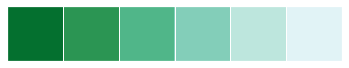

In [78]:
sns.palplot(sns.color_palette("BuGn_r"))

In [84]:
sns.set_palette("BuGn_r")

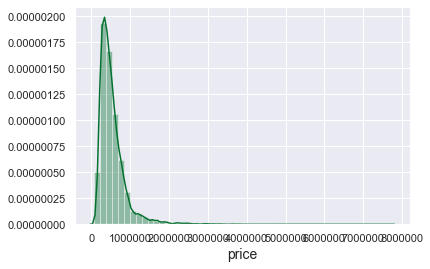

In [85]:
#examine target
target = 'price'
sns.distplot(df[target])

Displot looks like a slight left skew.

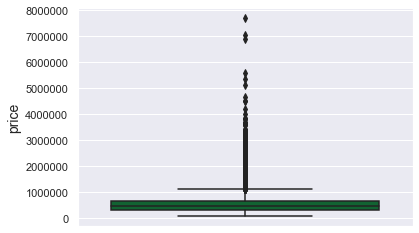

In [86]:
sns.boxplot(y= df[target])

Boxplot shows outliers on the high price end

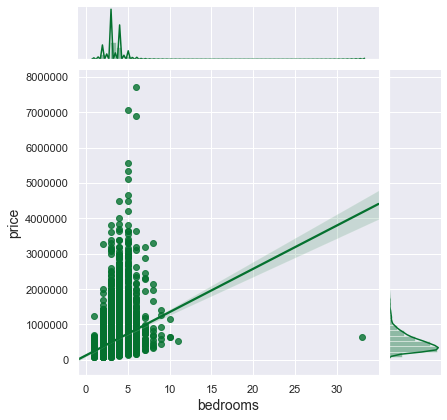

In [87]:
sns.jointplot(data=df, x = 'bedrooms', y=target,  kind = 'reg')

Set up a joint plot to compare dependent and independent variables.

Below is based off of in class lesson to make sorting through graphs of columns easier using interact. 

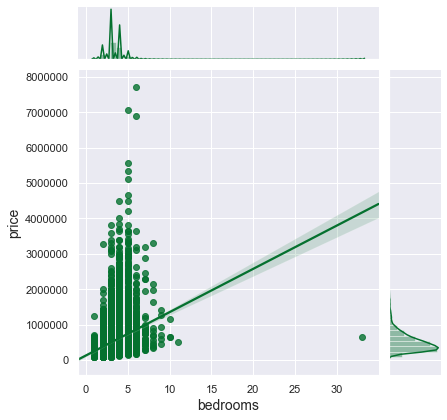

In [88]:
joint = sns.jointplot(data=df, x = 'bedrooms', y=target,  kind = 'reg')
fig = joint.fig
ax = fig.get_axes()

In [99]:
def joint_graphs(df, col, target = 'price'):
    
    sns.set(rc={'axes.labelsize': 14})
    sns.color_palette("BuGn_r")        
    joint = sns.jointplot(data = df, x = col, y=target,
                          kind='reg', height = 7)
    plt.suptitle(f" Comparing {col} and {target}", fontsize = 14)
    return joint
    

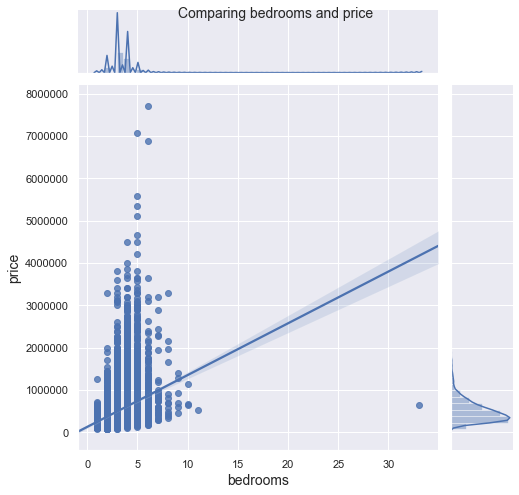

In [100]:
joint_graphs(df, 'bedrooms')

In [101]:
from ipywidgets import interact

In [42]:
@interact 
def show_plot(col=num_cols):
#for col in num_cols:
    joint_graphs(df, col)

interactive(children=(Dropdown(description='col', options=('price', 'bedrooms', 'bathrooms', 'sqft_living', 's…

### Ordinal Categorical Data

Below I decided to make zipcode and condition categorical data. Using get_dummies I one-hot encoded those columns.

In [44]:
#Use Dummy encoding/One-Hot Encoding
df_ohe = pd.get_dummies(df, columns=['zipcode', 'condition'], drop_first=True)

In [45]:
df_ohe.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,...,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,condition_2,condition_3,condition_4,condition_5
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### First R-squared Model

In [134]:
features = '+'.join(df_ohe.drop(columns=['price', 'date']).columns)
features

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+grade+sqft_above+sqft_basement+yr_built+yr_renovated+lat+long+sqft_living15+sqft_lot15+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcode_98122+zipcode_98125+zipcode_98126+zipcode_98133+zipcode_98136+zipcode_98144+zipcode_98146+zipcode_9

In [135]:
def create_model(df, col, y_true):
    features = '+'.join(df.drop(columns= col).columns)
    formula = target + '~' + features
    model = smf.ols(formula, df_ohe).fit()
    display(model.summary())
    
    fig, ax = plt.subplots(ncols = 2, figsize = (8,8))
    
    sm.graphics.qqplot(model.resid, fit=True, 
                       line= '45',ax=ax[0], color = 'g')
    
    ax=ax[1]
    ax.scatter(y_true, model.resid, color = 'g')
    ax.axhline(color = 'r')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1012.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:57:18   Log-Likelihood:            -2.8625e+05
No. Observations:               21357   AIC:                         5.727e+05
Df Residuals:                   21267   BIC:                         5.734e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.536e+07   6.16e+06     -4.116      0.000   -3.74e+07   -1.33e+07
bedrooms      -2.712e+04   1547.821    -17.521      0.000   -3.02e+04   -2.41e+04
bathrooms      2.305e+04   2647.551      8.705      0.000    1.79e+04    2.82e+04
sqft_living     101.1149     14.456      6.995      0.000      72.779     129.450
sqft_lot          0.2369      0.038      6.160      0.000       0.162       0.312
floors        -4.476e+04   3172.617    -14.108      0.000    -5.1e+04   -3.85e+04
waterfront     6.638e+05   1.48e+04     44.950      0.000    6.35e+05    6.93e+05
view           5.827e+04   1748.167     33.334      0.000    5.48e+04    6.17e+04
grade          5.833e+04   1834.631     31.796      0.000    5.47e+04    6.19e+04
sqft_above      106.8461     14.483      7.377      0.000      78.459     135.233
sqft_basement    27.8622     14.311      1.947      0.052      -0.189      55.913
yr_built       -705.9135     65.138    -10.837      0.000    -833.589    -578.238
yr_renovated     20.1941      3.218      6.275      0.000      13.886      26.502
lat            1.968e+05   6.37e+04      3.087      0.002    7.18e+04    3.22e+05
long          -1.385e+05   4.57e+04     -3.034      0.002   -2.28e+05   -4.91e+04
sqft_living15     9.5583      2.901      3.295      0.001       3.872      15.245
sqft_lot15       -0.1294      0.061     -2.137      0.033      -0.248      -0.011
zipcode_98002  3.527e+04   1.45e+04      2.425      0.015    6766.730    6.38e+04
zipcode_98003  -2.38e+04    1.3e+04     -1.827      0.068   -4.93e+04    1726.633
zipcode_98004  7.234e+05   2.36e+04     30.618      0.000    6.77e+05     7.7e+05
zipcode_98005   2.55e+05   2.52e+04     10.110      0.000    2.06e+05    3.04e+05
zipcode_98006  2.318e+05   2.07e+04     11.223      0.000    1.91e+05    2.72e+05
zipcode_98007  2.018e+05   2.61e+04      7.736      0.000    1.51e+05    2.53e+05
zipcode_98008  2.104e+05   2.47e+04      8.511      0.000    1.62e+05    2.59e+05
zipcode_98010  1.012e+05   2.21e+04      4.570      0.000    5.78e+04    1.45e+05
zipcode_98011  4.249e+04   3.22e+04      1.320      0.187   -2.06e+04    1.06e+05
zipcode_98014  8.637e+04   3.53e+04      2.443      0.015    1.71e+04    1.56e+05
zipcode_98019  4.955e+04   3.48e+04      1.423      0.155   -1.87e+04    1.18e+05
zipcode_98022  3.982e+04   1.92e+04      2.070      0.038    2116.194    7.75e+04
zipcode_98023 -4.776e+04    1.2e+04     -3.981      0.000   -7.13e+04   -2.42e+04
zipcode_98024  1.554e+05   3.12e+04      4.989      0.000    9.44e+04    2.17e+05
zipcode_98027  1.568e+05   2.12e+04      7.408      0.000    1.15e+05    1.98e+05
zipcode_98028  3.521e+04   3.13e+04      1.126      0.260   -2.61e+04    9.65e+04
zipcode_98029  1.971e+05   2.42e+04      8.152      0.000     1.5e+05    2.44e+05
zipcode_98030  3664.1999   1.43e+04      0.256   

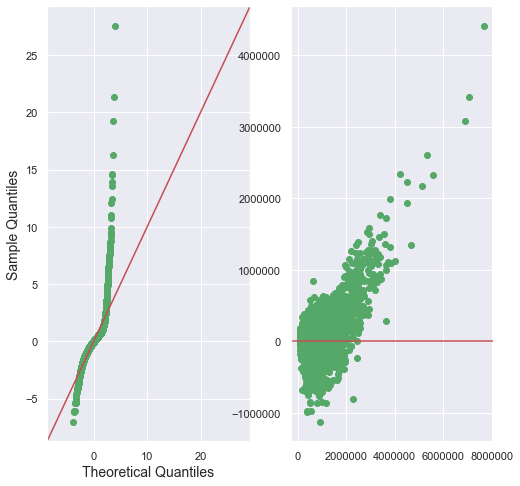

In [136]:
create_model(df = df_ohe, col = ['price', 'date'], y_true = df_ohe[target])

- Higher R-squared of .809. First R-squared was .700. Went back and decided to scrub data better.
- Problem P-value rows

### Dealing with P-Values

In [140]:
def remove_p(df, col, y_true):
    features = '+'.join(df.drop(columns= col).columns)
    formula = target + '~' + features
    model = smf.ols(formula, df_ohe).fit()
    
    p_val = model.pvalues.sort_values(ascending=True)
    bad = list(p_val[p_val > .05].index)
    return bad

In [141]:
remove_p(df = df_ohe, col = ['price', 'date'], y_true = df_ohe[target])

['sqft_basement',
 'zipcode_98003',
 'zipcode_98155',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98198',
 'zipcode_98055',
 'zipcode_98019',
 'zipcode_98011',
 'zipcode_98148',
 'zipcode_98028',
 'zipcode_98042',
 'zipcode_98058',
 'zipcode_98166',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98188',
 'zipcode_98030',
 'zipcode_98178']

Changed create_model function above after removing p_values and it would no longer work. Therefore I made the above remove_p function.

In [133]:
#sort p-val in ascending order & assign variable
p_val = model.pvalues.sort_values(ascending=True)

AttributeError: 'NoneType' object has no attribute 'pvalues'

In [74]:
p_val

waterfront      0.000
zipcode_98039   0.000
view            0.000
grade           0.000
zipcode_98004   0.000
                 ... 
zipcode_98031   0.612
zipcode_98032   0.614
zipcode_98188   0.642
zipcode_98030   0.798
zipcode_98178   0.898
Length: 90, dtype: float64

In [75]:
#p_vals over .05
p_val[p_val > .05]

sqft_basement   0.052
zipcode_98003   0.068
zipcode_98155   0.068
zipcode_98077   0.080
zipcode_98092   0.085
zipcode_98198   0.102
zipcode_98055   0.140
zipcode_98019   0.155
zipcode_98011   0.187
zipcode_98148   0.223
zipcode_98028   0.260
zipcode_98042   0.267
zipcode_98058   0.270
zipcode_98166   0.414
zipcode_98031   0.612
zipcode_98032   0.614
zipcode_98188   0.642
zipcode_98030   0.798
zipcode_98178   0.898
dtype: float64

In [76]:
bad = list(p_val[p_val > .05].index)

Below I am checking to see if 'Intercept' is listed in the bad list. 

In [77]:
bad

['sqft_basement',
 'zipcode_98003',
 'zipcode_98155',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98198',
 'zipcode_98055',
 'zipcode_98019',
 'zipcode_98011',
 'zipcode_98148',
 'zipcode_98028',
 'zipcode_98042',
 'zipcode_98058',
 'zipcode_98166',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98188',
 'zipcode_98030',
 'zipcode_98178']

In [78]:
# % of overall data to drop
len(bad)/len(df_ohe.columns)

0.2087912087912088

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1012.
Date:                Wed, 26 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:49:19   Log-Likelihood:            -2.8625e+05
No. Observations:               21357   AIC:                         5.727e+05
Df Residuals:                   21267   BIC:                         5.734e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.536e+07   6.16e+06     -4.116      0.000   -3.74e+07   -1.33e+07
bedrooms      -2.712e+04   1547.821    -17.521      0.000   -3.02e+04   -2.41e+04
bathrooms      2.305e+04   2647.551      8.705      0.000    1.79e+04    2.82e+04
sqft_living     101.1149     14.456      6.995      0.000      72.779     129.450
sqft_lot          0.2369      0.038      6.160      0.000       0.162       0.312
floors        -4.476e+04   3172.617    -14.108      0.000    -5.1e+04   -3.85e+04
waterfront     6.638e+05   1.48e+04     44.950      0.000    6.35e+05    6.93e+05
view           5.827e+04   1748.167     33.334      0.000    5.48e+04    6.17e+04
grade          5.833e+04   1834.631     31.796      0.000    5.47e+04    6.19e+04
sqft_above      106.8461     14.483      7.377      0.000      78.459     135.233
sqft_basement    27.8622     14.311      1.947      0.052      -0.189      55.913
yr_built       -705.9135     65.138    -10.837      0.000    -833.589    -578.238
yr_renovated     20.1941      3.218      6.275      0.000      13.886      26.502
lat            1.968e+05   6.37e+04      3.087      0.002    7.18e+04    3.22e+05
long          -1.385e+05   4.57e+04     -3.034      0.002   -2.28e+05   -4.91e+04
sqft_living15     9.5583      2.901      3.295      0.001       3.872      15.245
sqft_lot15       -0.1294      0.061     -2.137      0.033      -0.248      -0.011
zipcode_98002  3.527e+04   1.45e+04      2.425      0.015    6766.730    6.38e+04
zipcode_98003  -2.38e+04    1.3e+04     -1.827      0.068   -4.93e+04    1726.633
zipcode_98004  7.234e+05   2.36e+04     30.618      0.000    6.77e+05     7.7e+05
zipcode_98005   2.55e+05   2.52e+04     10.110      0.000    2.06e+05    3.04e+05
zipcode_98006  2.318e+05   2.07e+04     11.223      0.000    1.91e+05    2.72e+05
zipcode_98007  2.018e+05   2.61e+04      7.736      0.000    1.51e+05    2.53e+05
zipcode_98008  2.104e+05   2.47e+04      8.511      0.000    1.62e+05    2.59e+05
zipcode_98010  1.012e+05   2.21e+04      4.570      0.000    5.78e+04    1.45e+05
zipcode_98011  4.249e+04   3.22e+04      1.320      0.187   -2.06e+04    1.06e+05
zipcode_98014  8.637e+04   3.53e+04      2.443      0.015    1.71e+04    1.56e+05
zipcode_98019  4.955e+04   3.48e+04      1.423      0.155   -1.87e+04    1.18e+05
zipcode_98022  3.982e+04   1.92e+04      2.070      0.038    2116.194    7.75e+04
zipcode_98023 -4.776e+04    1.2e+04     -3.981      0.000   -7.13e+04   -2.42e+04
zipcode_98024  1.554e+05   3.12e+04      4.989      0.000    9.44e+04    2.17e+05
zipcode_98027  1.568e+05   2.12e+04      7.408      0.000    1.15e+05    1.98e+05
zipcode_98028  3.521e+04   3.13e+04      1.126      0.260   -2.61e+04    9.65e+04
zipcode_98029  1.971e+05   2.42e+04      8.152      0.000     1.5e+05    2.44e+05
zipcode_98030  3664.1999   1.43e+04      0.256   

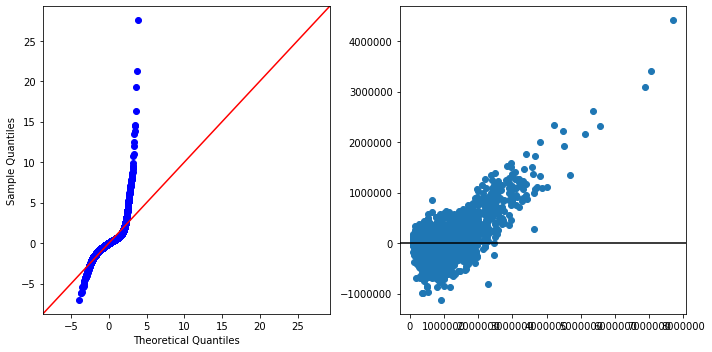

In [79]:
model = make_model(df_ohe, columns = [target, bad])
graph_model(model, df_ohe[target])

- R-squared did not change
- P-values taken care of

# In class

### Check for multicollinearity

In [60]:
data_pred = df.iloc[:, 2: 21]
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.000,1180,5650,1.000,0.000,0.000,3,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.000,1933,0.000,98028,47.738,-122.233,2720,8062
3,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503


In [61]:
data_pred.drop(['floors'], axis=1, inplace=True)

In [62]:
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.000,1180,5650,0.000,0.000,3,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,3,2.250,2570,7242,0.000,0.000,3,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2,1.000,770,10000,0.000,0.000,3,6,770,0.000,1933,0.000,98028,47.738,-122.233,2720,8062
3,4,3.000,1960,5000,0.000,0.000,5,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,3,2.000,1680,8080,0.000,0.000,3,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503


In [63]:
data_pred.corr().abs()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000,0.515,0.579,0.033,0.004,0.079,0.026,0.358,0.480,0.296,0.155,0.017,0.155,0.012,0.133,0.394,0.031
bathrooms,0.515,1.000,0.755,0.088,0.061,0.185,0.130,0.665,0.686,0.277,0.507,0.047,0.204,0.023,0.224,0.569,0.088
sqft_living,0.579,0.755,1.000,0.173,0.102,0.282,0.062,0.762,0.877,0.427,0.317,0.051,0.199,0.051,0.241,0.756,0.184
sqft_lot,0.033,0.088,0.173,1.000,0.021,0.076,0.009,0.114,0.183,0.015,0.052,0.005,0.130,0.085,0.230,0.144,0.717
waterfront,0.004,0.061,0.102,0.021,1.000,0.383,0.016,0.081,0.070,0.081,0.025,0.074,0.030,0.012,0.038,0.082,0.031
view,0.079,0.185,0.282,0.076,0.383,1.000,0.045,0.248,0.166,0.271,0.056,0.090,0.088,0.006,0.079,0.278,0.074
condition,0.026,0.130,0.062,0.009,0.016,0.045,1.000,0.151,0.161,0.168,0.365,0.056,0.004,0.016,0.107,0.095,0.003
grade,0.358,0.665,0.762,0.114,0.081,0.248,0.151,1.000,0.756,0.163,0.447,0.015,0.184,0.113,0.199,0.713,0.121
sqft_above,0.480,0.686,0.877,0.183,0.070,0.166,0.161,0.756,1.000,0.053,0.423,0.020,0.261,0.002,0.344,0.732,0.195
sqft_basement,0.296,0.277,0.427,0.015,0.081,0.271,0.168,0.163,0.053,1.000,0.132,0.066,0.074,0.108,0.143,0.197,0.016


In [46]:
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


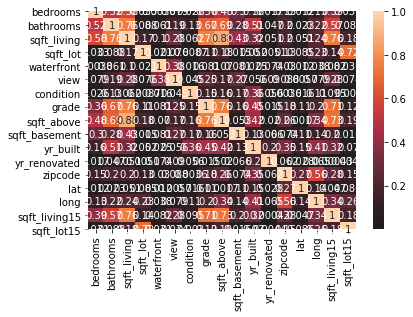

In [64]:
sns.heatmap(data_pred.corr().abs(), annot=True, center=0)

Trying replacing df with data and reruning. Think I am going over original df.

In [47]:
df1 = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df1['pairs'] = list(zip(df1.level_0, df1.level_1))
df1.set_index(['pairs'], inplace=True)
df1.drop(columns=['level_1', 'level_0'], inplace=True)
df1.columns = ['cc']
df1.drop_duplicates(inplace=True)

In [48]:
df1[(df1.cc>.75) & (df1.cc< 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.877
"(grade, sqft_living)",0.763
"(grade, sqft_above)",0.757
"(sqft_living, sqft_living15)",0.757
"(bathrooms, sqft_living)",0.755


High Correlation:
- bathroom with sqft_living 
- sqft_living with bathroom, grade, sqft_above, sqft_living15
- grade with sqft_living, sqft_above
- sqft_above with grade and sqft_living


Since sqft_living is highly correlated with other columns I will choose to remove it in order to remove collinear features. I will also drop sqft_above in order to ensure removing collinearity with grade.

In [68]:
data_pred

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.000,5650,0.000,0.000,3,7,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,3,2.250,7242,0.000,0.000,3,7,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2,1.000,10000,0.000,0.000,3,6,0.000,1933,0.000,98028,47.738,-122.233,2720,8062
3,4,3.000,5000,0.000,0.000,5,7,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,3,2.000,8080,0.000,0.000,3,8,0.000,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.500,1131,0.000,0.000,3,8,0.000,2009,0.000,98103,47.699,-122.346,1530,1509
21593,4,2.500,5813,0.000,0.000,3,8,0.000,2014,0.000,98146,47.511,-122.362,1830,7200
21594,2,0.750,1350,0.000,0.000,3,7,0.000,2009,0.000,98144,47.594,-122.299,1020,2007
21595,3,2.500,2388,0.000,0.000,3,8,0.000,2004,0.000,98027,47.535,-122.069,1410,1287


In [66]:
#Drop columns with high collinearity
#data_pred.drop(['sqft_living', 'sqft_above'], axis=1, inplace=True)

KeyError: "['sqft_living' 'sqft_above'] not found in axis"

In [67]:
data_pred.head()

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.000,5650,0.000,0.000,3,7,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,3,2.250,7242,0.000,0.000,3,7,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2,1.000,10000,0.000,0.000,3,6,0.000,1933,0.000,98028,47.738,-122.233,2720,8062
3,4,3.000,5000,0.000,0.000,5,7,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,3,2.000,8080,0.000,0.000,3,8,0.000,1987,0.000,98074,47.617,-122.045,1800,7503


In [52]:
#Double check to ensure there is no collinearity left
# df1 = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# df1['pairs'] = list(zip(df1.level_0, df1.level_1))
# df1.set_index(['pairs'], inplace=True)
# df1.drop(columns=['level_1', 'level_0'], inplace=True)
# df1.columns = ['cc']
# df1.drop_duplicates(inplace=True)

In [53]:
# df[(df.cc>.75) & (df.cc< 1)]

In [54]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0.000,0.000,3,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,0.000,1933,0.000,98028,47.738,-122.233,2720,8062
3,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,3,8,1530,0.000,2009,0.000,98103,47.699,-122.346,1530,1509
21593,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,3,8,2310,0.000,2014,0.000,98146,47.511,-122.362,1830,7200
21594,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,3,7,1020,0.000,2009,0.000,98144,47.594,-122.299,1020,2007
21595,1/16/2015,400000.000,3,2.500,1600,2388,2.000,0.000,0.000,3,8,1600,0.000,2004,0.000,98027,47.535,-122.069,1410,1287


In [55]:
data_pred

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.000,5650,0.000,0.000,3,7,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,3,2.250,7242,0.000,0.000,3,7,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2,1.000,10000,0.000,0.000,3,6,0.000,1933,0.000,98028,47.738,-122.233,2720,8062
3,4,3.000,5000,0.000,0.000,5,7,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,3,2.000,8080,0.000,0.000,3,8,0.000,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.500,1131,0.000,0.000,3,8,0.000,2009,0.000,98103,47.699,-122.346,1530,1509
21593,4,2.500,5813,0.000,0.000,3,8,0.000,2014,0.000,98146,47.511,-122.362,1830,7200
21594,2,0.750,1350,0.000,0.000,3,7,0.000,2009,0.000,98144,47.594,-122.299,1020,2007
21595,3,2.500,2388,0.000,0.000,3,8,0.000,2004,0.000,98027,47.535,-122.069,1410,1287


In [74]:
desire_col = list(data_pred)
formula = 'price ~ ' + '+'.join(desire_col)
model = smf.ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2784.
Date:                Tue, 25 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:56:22   Log-Likelihood:            -2.8887e+05
No. Observations:               21106   AIC:                         5.778e+05
Df Residuals:                   21090   BIC:                         5.779e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9.396e+06   3.08e+06      3.046      0.002    3.35e+06    1.54e+07
bedrooms      -6293.3913   1929.557     -3.262      0.001   -1.01e+04   -2511.312
bathrooms      1.028e+05   3111.120     33.052      0.000    9.67e+04    1.09e+05
sqft_lot          0.2496      0.052      4.817      0.000       0.148       0.351
waterfront     6.408e+05   1.93e+04     33.249      0.000    6.03e+05    6.79e+05
view           5.292e+04   2277.596     23.234      0.000    4.85e+04    5.74e+04
condition      2.271e+04   2499.869      9.083      0.000    1.78e+04    2.76e+04
grade           1.42e+05   2093.488     67.823      0.000    1.38e+05    1.46e+05
sqft_basement    40.9217      3.855     10.616      0.000      33.366      48.477
yr_built      -3045.3269     74.550    -40.849      0.000   -3191.451   -2899.203
yr_renovated     24.8565      4.210      5.905      0.000      16.605      33.108
zipcode        -511.3646     35.079    -14.578      0.000    -580.121    -442.608
lat            5.704e+05   1.14e+04     49.923      0.000    5.48e+05    5.93e+05
long          -1.522e+05   1.39e+04    -10.940      0.000    -1.8e+05   -1.25e+05
sqft_living15    87.0897      3.374     25.809      0.000      80.476      93.704
sqft_lot15       -0.1951      0.078     -2.487      0.013      -0.349      -0.041
==============================================================================
Omnibus:                    20487.053   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3263280.026
Skew:                           4.309   Prob(JB):                         0.00
Kurtosis:                      63.303   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
# desire_col = list(data_pred[col], axis=1).columns()
# formula = 'price ~ ' + '+'.join(desire_col)
# model = smf.ols(formula, df).fit()
# model.summary()

KeyError: 5650

### Check for normality

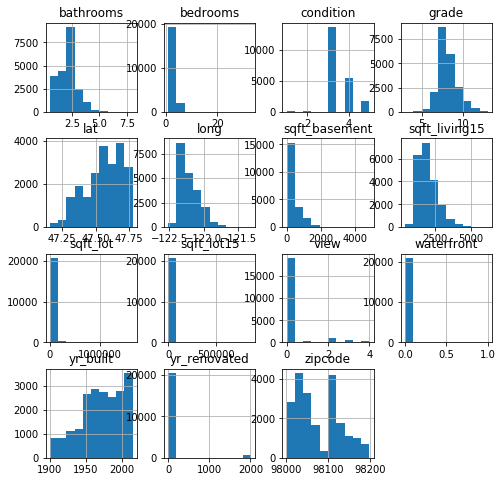

In [57]:
data_pred.hist(figsize=(8,8));

In [58]:
from scipy.stats import zscore
data_pred_z = data_pred.apply(zscore)

In [59]:
data_pred_z

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.404,-1.452,-0.229,-0.083,-0.305,-0.629,-0.562,-0.649,-0.546,-0.191,1.871,-0.353,-0.306,-0.944,-0.260
1,-0.404,0.173,-0.191,-0.083,-0.305,-0.629,-0.562,0.261,-0.682,5.222,0.881,1.161,-0.746,-0.433,-0.188
2,-1.482,-1.452,-0.123,-0.083,-0.305,-0.629,-1.414,-0.649,-1.294,-0.191,-0.932,1.283,-0.136,1.070,-0.172
3,0.675,1.148,-0.245,-0.083,-0.305,2.443,-0.562,1.422,-0.206,-0.191,1.086,-0.284,-1.271,-0.915,-0.284
4,-0.404,-0.152,-0.170,-0.083,-0.305,-0.629,0.291,-0.649,0.543,-0.191,-0.072,0.409,1.199,-0.273,-0.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.404,0.498,-0.339,-0.083,-0.305,-0.629,0.291,-0.649,1.291,-0.191,0.470,1.004,-0.938,-0.667,-0.412
21593,0.675,0.498,-0.225,-0.083,-0.305,-0.629,0.291,-0.649,1.461,-0.191,1.273,-0.357,-1.051,-0.229,-0.204
21594,-1.482,-1.777,-0.334,-0.083,-0.305,-0.629,-0.562,-0.649,1.291,-0.191,1.236,0.247,-0.604,-1.411,-0.393
21595,-0.404,0.498,-0.309,-0.083,-0.305,-0.629,0.291,-0.649,1.121,-0.191,-0.951,-0.185,1.029,-0.842,-0.420


In [60]:
data_pred_col = list(data_pred)

If there is a really long right tail then consider log transformation

### Identify Outliers

do a for col in columns to get outliers individually

In [61]:
data_pred_z = data_pred.apply(zscore)

In [62]:
from scipy import stats
def find_outliers_z(data):
    zFP = np.abs(stats.zscore(data))
    #zFP = pd.Series(zFP, index = data.index)
    idx_outliers = zFP > 3
    return idx_outliers

In [63]:
for col in data_pred[col]:
    find_outliers_z(data_pred[col])

KeyError: 5650

If we removed all outliers at once.

In [ ]:
idx = find_outliers_z(data_pred)

In [ ]:
idx.sum(axis=1)

In [ ]:
pd.Series(idx.any(axis=1)).value_counts()

In [ ]:
find_outliers_z(data_pred[col])

In [ ]:
df_outliers = pd.DataFrame

In [ ]:
#this is for single column of true and falses
import statsmodels.formula.api as smf
df_clean = df[~idx_outliers].copy()
df_clean

In [ ]:
# f = "SalePrice-_________"
# model = smf.ols(f, df_clean).fit()
# display(model.summary())
# fig = sm.graphics.qqplot(model.resid, dist=stats, norm, fit=True, line = '45')
# fig = sm.graphics.plot_regression_exog(model, "__________", fig=plt.figure(figsize=(8,8)))

# Model

# Interpret

# Notes

Next Steps?

- look for categories that show linear relationship to price. 
    - create a loop to go through each column to show relationship.
    -Check for multicollinearity



- Normalize data
    - do I pick features like in example project? 
    - categorical data? dummies?
- perform EDA?
    - histograms
    - KDE plots
- Model Data
    - perform ols
    - Check for multicollinearity using vif
    - Check for normality using qqplot 
    - Check for homoscedasicity using regplot 
    - Refine? How to know when to refine?
    

Tableau Public - free data science tool for location

- Zipcode I need to one hot encode.
- If just zero and one such as waterfront count it as already one hot encoded
- King county grading system (grade) Grade shows slightly linear
- Condition - possibly one hot encoded category (line is straight across)


In [68]:
coeffs = model.params.sort_values(ascending=False)
coeffs
#if you increase by one thats the increase in selling point. 
coeffs.sort_index().to_frame('Coefficients').style.background_gradient(cmaps = 'blue'')

TypeError: background_gradient() got an unexpected keyword argument 'color'